### Getting started 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime as dt
%matplotlib inline

In [3]:
#reading cleaned dataset

train_01 = pd.read_csv('../Data/train_clean.csv')

## Data Preprocessing

### Feature creation

#### Hypothesis: yards gained by running play or passing play impacts outcome of the game? 
Looking at the yards gained per running play vs. passing play 
- number of running plays vs passing plays
- percentage running plays vs passing plays 
- is there a difference in home and away team?
- average over all years and games, teams 
- percentages per team per game 
- compare averages of each team, per game with the general average 


In [4]:
# splitting DF into data of home team and data of away team
home = train_01.loc[train_01['posteam_type'] == 'home']
away = train_01.loc[train_01['posteam_type'] == 'away']

# filtering for running plays and passing plays 
away = away[['game_id','game_date','play_id','play_type','yards_gained']]
away_run = away.loc[away['play_type'] == 'run']
away_pass = away.loc[away['play_type'] == 'pass']

home = home[['game_id','game_date','play_id','play_type','yards_gained']]
home_run = home.loc[home['play_type'] == 'run']
home_pass = home.loc[home['play_type'] == 'pass']

In [5]:
# aggregating the yards gained per game for all running plays of the away team 
away_run_sum = away_run.groupby(['game_date', 'game_id'], as_index = False).sum()
away_run_sum

,game_date,game_id,play_id,yards_gained
0,2009-09-10,2009091000,49568,86.0
1,2009-09-13,2009091300,38952,96.0
2,2009-09-13,2009091301,30068,29.0
3,2009-09-13,2009091302,74682,186.0
4,2009-09-13,2009091303,36600,75.0
...,...,...,...,...
1786,2016-01-03,2016010311,43486,69.0
1787,2016-01-03,2016010312,45002,77.0
1788,2016-01-03,2016010313,54259,110.0
1789,2016-01-03,2016010314,70234,147.0


In [6]:
# aggregating the yards gained per game for all passing plays of the away team 
away_pass_sum = away_pass.groupby(['game_date', 'game_id'], as_index = False).sum()

In [7]:
# aggregating the yards gained per game for all running plays of the home team 
home_run_sum = home_run.groupby(['game_date', 'game_id'], as_index = False).sum()

In [8]:
# aggregating the yards gained per game for all running plays of the away team 
home_pass_sum = home_pass.groupby(['game_date', 'game_id'], as_index = False).sum()

### Calculating the percentage of running plays and passing plays in general

Count of all running plays/ total count of all plays = percentage of running plays 

Count of all passing plays/ total count of all plays = percentage of passing plays 


In [9]:
total_running_plays = away_run.shape[0] + home_run.shape[0]
total_running_plays

94373

In [10]:
total_passing_plays = away_pass.shape[0] + home_pass.shape[0]
total_passing_plays

131228

In [11]:
total_plays = total_running_plays + total_passing_plays
total_plays

225601

In [12]:
perc_run_plays = total_running_plays / total_plays
perc_run_plays

0.41831818121373576

In [13]:
perc_pass_plays = total_passing_plays / total_plays
perc_pass_plays

0.5816818187862642

#### The average game (in the given time frame from 2009 to 2016) consists of 41.83% running plays and 58.17% of passing plays

### Calculating the percentages for the home team and the away team

In [14]:
total_run_away = away_run.shape[0]

In [15]:
total_pass_away = away_pass.shape[0]

In [16]:
total_run_home = home_run.shape[0]

In [17]:
total_pass_home = home_pass.shape[0]

In [18]:
total_away_plays = total_run_away + total_pass_away

In [19]:
total_home_plays = total_run_home + total_pass_home
total_home_plays

113236

In [20]:
perc_run_away = total_run_away/ total_away_plays
perc_run_away

0.41322475859920793

In [21]:
perc_pass_away = total_pass_away/ total_away_plays
perc_pass_away

0.5867752414007921

In [22]:
perc_pass_home = total_pass_away/ total_home_plays
perc_pass_home

0.5822618248613515

In [23]:
perc_run_home = total_run_away/ total_home_plays
perc_run_home

0.41004627503620755

No significant difference!

### Calculating the average yards gained per play (running vs passing)

SUM( yards_gained by running play) / total plays

SUM( yards_gained by passing play) / total plays

In [24]:
# summing the yards gained by running of the away team and home team
sum_yards_running = sum(away_run_sum.yards_gained) + sum(home_run_sum.yards_gained)
sum_yards_running

410219.0

In [25]:
# summing the yards gained by passing of the away team and home team
sum_yards_passing = sum(away_pass_sum.yards_gained) + sum(home_pass_sum.yards_gained)
sum_yards_passing

826994.0

In [26]:
# average yards gained per running play 

avg_yards_running = sum_yards_running / total_plays
avg_yards_running


1.8183385711942766

In [27]:
yards_run = sum_yards_running/ total_running_plays
yards_run

4.346783507994871

In [28]:
# average yards gained per passing play 

avg_yards_passing = sum_yards_passing / total_plays
avg_yards_passing

3.665737297263753

In [29]:
yards_pass = sum_yards_passing/ total_passing_plays
yards_pass

6.301962995702136

##### average yards by passing game: 6.3
##### average yards by running game: 4.4

I expected the yards gained by passing to be much higher than the yards gained by running. Maybe the number of passing games that are incomplete or result in a loss of yards (negative yards gained) overweigh the succesful/completed passes. 

### Describtive statistics of 'yards_gained' column

In [30]:
home_run['yards_gained'].describe()

count    47941.000000
mean         4.395132
std          6.526462
min        -18.000000
25%          1.000000
50%          3.000000
75%          6.000000
max         97.000000
Name: yards_gained, dtype: float64

In [31]:
away_run['yards_gained'].describe()

count    46432.000000
mean         4.296864
std          6.363918
min        -27.000000
25%          1.000000
50%          3.000000
75%          6.000000
max         91.000000
Name: yards_gained, dtype: float64

In [32]:
home_pass['yards_gained'].describe()

count    65295.000000
mean         6.442913
std         10.219999
min        -28.000000
25%          0.000000
50%          4.000000
75%         11.000000
max         95.000000
Name: yards_gained, dtype: float64

In [33]:
away_pass['yards_gained'].describe()

count    65933.000000
mean         6.162377
std         10.136692
min        -38.000000
25%          0.000000
50%          3.000000
75%         10.000000
max         99.000000
Name: yards_gained, dtype: float64

(array([4.0000e+00, 2.0000e+01, 1.0900e+02, 1.3520e+03, 1.3328e+04,
        1.6706e+04, 9.4700e+03, 3.5780e+03, 1.5630e+03, 6.9300e+02,
        3.4300e+02, 1.7100e+02, 1.5300e+02, 1.2800e+02, 8.1000e+01,
        5.0000e+01, 3.8000e+01, 2.8000e+01, 2.5000e+01, 1.9000e+01,
        2.0000e+01, 1.2000e+01, 1.0000e+01, 7.0000e+00, 7.0000e+00,
        1.0000e+01, 3.0000e+00, 6.0000e+00, 5.0000e+00, 2.0000e+00]),
 array([-18.        , -14.16666667, -10.33333333,  -6.5       ,
         -2.66666667,   1.16666667,   5.        ,   8.83333333,
         12.66666667,  16.5       ,  20.33333333,  24.16666667,
         28.        ,  31.83333333,  35.66666667,  39.5       ,
         43.33333333,  47.16666667,  51.        ,  54.83333333,
         58.66666667,  62.5       ,  66.33333333,  70.16666667,
         74.        ,  77.83333333,  81.66666667,  85.5       ,
         89.33333333,  93.16666667,  97.        ]),
 <a list of 30 Patch objects>)

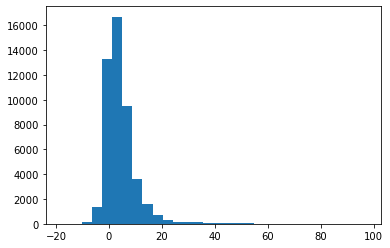

In [34]:
plt.hist(home_run['yards_gained'], bins = 30)

(array([1.0000e+00, 0.0000e+00, 3.0000e+00, 1.1000e+01, 6.4000e+01,
        7.2400e+02, 8.2260e+03, 2.1685e+04, 9.2360e+03, 3.3780e+03,
        1.3830e+03, 6.6500e+02, 3.4700e+02, 2.1300e+02, 9.4000e+01,
        9.6000e+01, 6.4000e+01, 5.4000e+01, 4.1000e+01, 3.9000e+01,
        3.0000e+01, 1.2000e+01, 1.8000e+01, 1.1000e+01, 1.1000e+01,
        4.0000e+00, 7.0000e+00, 1.3000e+01, 1.0000e+00, 1.0000e+00]),
 array([-27.        , -23.06666667, -19.13333333, -15.2       ,
        -11.26666667,  -7.33333333,  -3.4       ,   0.53333333,
          4.46666667,   8.4       ,  12.33333333,  16.26666667,
         20.2       ,  24.13333333,  28.06666667,  32.        ,
         35.93333333,  39.86666667,  43.8       ,  47.73333333,
         51.66666667,  55.6       ,  59.53333333,  63.46666667,
         67.4       ,  71.33333333,  75.26666667,  79.2       ,
         83.13333333,  87.06666667,  91.        ]),
 <a list of 30 Patch objects>)

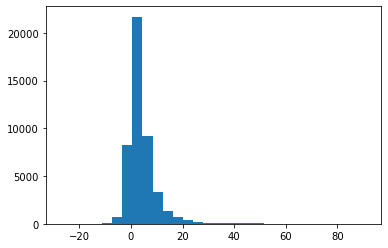

In [35]:
plt.hist(away_run['yards_gained'],bins = 30)

(array([4.0000e+00, 1.1000e+01, 4.1000e+01, 2.1500e+02, 1.2970e+03,
        1.8050e+03, 2.5170e+04, 5.9010e+03, 1.0297e+04, 7.6940e+03,
        5.7010e+03, 2.5670e+03, 1.5360e+03, 8.9000e+02, 5.7200e+02,
        4.1700e+02, 2.7400e+02, 2.2300e+02, 1.8900e+02, 1.4000e+02,
        1.0100e+02, 7.3000e+01, 4.6000e+01, 4.0000e+01, 3.1000e+01,
        2.2000e+01, 2.1000e+01, 6.0000e+00, 8.0000e+00, 3.0000e+00]),
 array([-28. , -23.9, -19.8, -15.7, -11.6,  -7.5,  -3.4,   0.7,   4.8,
          8.9,  13. ,  17.1,  21.2,  25.3,  29.4,  33.5,  37.6,  41.7,
         45.8,  49.9,  54. ,  58.1,  62.2,  66.3,  70.4,  74.5,  78.6,
         82.7,  86.8,  90.9,  95. ]),
 <a list of 30 Patch objects>)

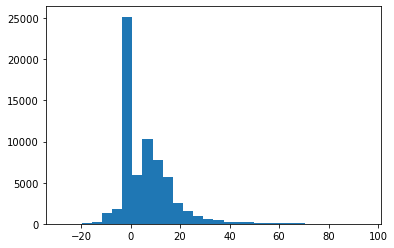

In [36]:
plt.hist(home_pass['yards_gained'], bins = 30)

(array([1.0000e+00, 0.0000e+00, 1.0000e+00, 1.4000e+01, 3.6000e+01,
        3.8700e+02, 1.9050e+03, 2.2080e+03, 2.8934e+04, 9.9600e+03,
        1.0197e+04, 4.6390e+03, 3.3200e+03, 1.4570e+03, 1.0090e+03,
        5.3900e+02, 3.3000e+02, 3.2100e+02, 1.6300e+02, 1.4700e+02,
        8.6000e+01, 8.0000e+01, 5.6000e+01, 3.3000e+01, 3.4000e+01,
        3.9000e+01, 2.1000e+01, 6.0000e+00, 6.0000e+00, 4.0000e+00]),
 array([-38.        , -33.43333333, -28.86666667, -24.3       ,
        -19.73333333, -15.16666667, -10.6       ,  -6.03333333,
         -1.46666667,   3.1       ,   7.66666667,  12.23333333,
         16.8       ,  21.36666667,  25.93333333,  30.5       ,
         35.06666667,  39.63333333,  44.2       ,  48.76666667,
         53.33333333,  57.9       ,  62.46666667,  67.03333333,
         71.6       ,  76.16666667,  80.73333333,  85.3       ,
         89.86666667,  94.43333333,  99.        ]),
 <a list of 30 Patch objects>)

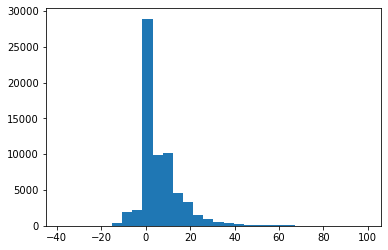

In [37]:
plt.hist(away_pass['yards_gained'],bins = 30)

### Risk Analysis

- What is the risk of having an unsuccesful play, a play with no gained yards (0 or less, lost yards, fumble with positive yards)?  
- What is the chance of ball loss (fumble or interception) in general and by running or passing play? 

In [38]:
# adding the columns for Interception and Fumble to the subsetted DF's

home = train_01.loc[train_01['posteam_type'] == 'home']
away = train_01.loc[train_01['posteam_type'] == 'away']

# filtering for running plays and passing plays 
away = away[['game_id','game_date','play_id','play_type','yards_gained', 'interception', 'fumble_lost']]
away_run = away.loc[away['play_type'] == 'run']
away_pass = away.loc[away['play_type'] == 'pass']

home = home[['game_id','game_date','play_id','play_type','yards_gained', 'interception', 'fumble_lost']]
home_run = home.loc[home['play_type'] == 'run']
home_pass = home.loc[home['play_type'] == 'pass']

##### General risk

In [39]:
# filtering for all plays with 0 yards gained or yards lost (negative yards gained)
away_run_failed = away_run.loc[away_run['yards_gained'] <= 0]
away_pass_failed = away_pass.loc[away_pass['yards_gained'] <= 0]
home_run_failed = home_run.loc[home_run['yards_gained'] <= 0 ]
home_pass_failed = home_pass.loc[home_pass['yards_gained'] <= 0]

fumble_yg_away_run = away_run.loc[(away_run['yards_gained'] > 0) & (away_run['fumble_lost'] == 1.0) ]
fumble_yg_away_pass = away_pass.loc[(away_pass['yards_gained'] > 0) & (away_pass['fumble_lost'] == 1.0) ]
fumble_yg_home_run = home_run.loc[(home_run['yards_gained'] > 0) & (home_run['fumble_lost'] == 1.0) ]
fumble_yg_home_pass = home_pass.loc[(home_pass['yards_gained'] > 0) & (home_pass['fumble_lost'] == 1.0) ]

In [40]:
total_plays_failed = (away_run_failed.shape[0] 
                      + away_pass_failed.shape[0] 
                      + home_run_failed.shape[0] 
                      + home_pass_failed.shape[0]
                     + fumble_yg_away_run.shape[0]
                     + fumble_yg_away_pass.shape[0]
                     + fumble_yg_home_run.shape[0]
                     + fumble_yg_home_pass.shape[0])

In [41]:
general_risk = total_plays_failed / total_plays
general_risk

0.34272011205624087

##### Risk running play 

In [42]:
total_run_failed = (away_run_failed.shape[0] + home_run_failed.shape[0] 
                    + fumble_yg_away_run.shape[0] + fumble_yg_home_run.shape[0])

In [43]:
running_risk = total_run_failed / total_running_plays
running_risk

0.19743994574719465

##### Risk passing play

In [44]:
total_pass_failed = (away_pass_failed.shape[0] + home_pass_failed.shape[0]
                     + fumble_yg_away_pass.shape[0] + fumble_yg_home_pass.shape[0])

In [45]:
passing_risk = total_pass_failed / total_passing_plays
passing_risk

0.44719876855549123

#### There is a general risk of 33.89%/ adjusted 34.3% of an unseccesful play. The risk of a running game is 19.7% and 44.7% for a passing game. 

##### The risk of loosing the ball
The ball can be lost by the team in posation if the quarterback throws an interception or if the defense team recovers a fumble (column 'fumble_lost'). An interception can only occur in a passing play, but a fumble can occur in a passing or running play. 

In [46]:
away_run_fum = away_run.loc[away_run['fumble_lost'] == 1.0]
away_pass_int = away_pass.loc[away_pass['interception'] == 1.0]
away_pass_fum = away_pass.loc[away_pass['fumble_lost'] == 1.0]
home_run_fum = home_run.loc[home_run['fumble_lost'] == 1.0]
home_pass_int = home_pass.loc[home_pass['interception'] == 1.0]
home_pass_fum = home_pass.loc[home_pass['fumble_lost'] == 1.0]

total_ball_losses = ( away_run_fum.shape[0]
                 + away_pass_int.shape[0]
                 + away_pass_fum.shape[0]
                 + home_run_fum.shape[0]
                 + home_pass_int.shape[0]
                 + home_pass_fum.shape[0])

In [47]:
ball_loss_risk = total_ball_losses / total_plays

ball_loss_risk

0.02271709788520441

In [48]:
ball_loss_run = (away_run_fum.shape[0] + home_run_fum.shape[0])

ball_loss_pass = ( away_pass_int.shape[0]
                 + away_pass_fum.shape[0]
                 + home_pass_int.shape[0]
                 + home_pass_fum.shape[0])

In [49]:
ball_loss_risk_run = ball_loss_run / total_running_plays
ball_loss_risk_run

0.00858296334756763

In [50]:
ball_loss_risk_pass = ball_loss_pass / total_passing_plays
ball_loss_risk_pass

0.03288170207577651

#### The general risk for the team in posation to loose the ball in a play is 2.27% . The risk to loose the ball to the defense team on a running play is just under 1% (0.86%) but the risk in a passing play is 3.29%

#### A passing play generally results in more yards gained but also has a higher chance of ball loss to the oponing team which automatically results in a end of the drive. 

Create dataframe with game based data

In [52]:
games = home_run.groupby('game_id', as_index = False).sum()
games

,game_id,play_id,yards_gained,interception,fumble_lost
0,2009091000,47250,36.0,0.0,0.0
1,2009091300,42430,72.0,0.0,0.0
2,2009091301,94007,198.0,0.0,0.0
3,2009091302,48103,87.0,0.0,1.0
4,2009091303,40456,86.0,0.0,0.0
...,...,...,...,...,...
1786,2016010311,43043,92.0,0.0,1.0
1787,2016010312,53927,113.0,0.0,0.0
1788,2016010313,70337,212.0,0.0,1.0
1789,2016010314,19370,27.0,0.0,0.0
